In [1]:
pip install np_utils


[notice] A new release of pip is available: 23.0.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import pickle

In [3]:
import pandas as pd

In [4]:
import random

In [5]:
with open('train.p', 'rb') as f:
    train_data = pickle.load(f)

with open('valid.p', 'rb') as f:
    valid_data = pickle.load(f)

with open('test.p', 'rb') as f:
    test_data = pickle.load(f)

print(type(train_data))

<class 'dict'>


In [6]:
X_train, y_train = train_data['features'], train_data['labels']
X_test, y_test = test_data['features'], test_data['labels']
X_valid, y_valid = valid_data['features'], valid_data['labels']


In [7]:
print(X_test.shape)
print(X_train.shape)
print(X_valid.shape)

(12630, 32, 32, 3)
(34799, 32, 32, 3)
(4410, 32, 32, 3)


In [8]:
assert(X_train.shape[0] == y_train.shape[0]), 'The number of images is not equal to number of labels '
assert(X_valid.shape[0] == y_valid.shape[0]), 'The number of images is not equal to number of labels '
assert(X_test.shape[0] == y_test.shape[0]), 'The number of images is not equal to number of labels '

assert(X_train.shape[1:] == (32,32,3)), "The dimensions of image are not 32,32,3"
assert(X_valid.shape[1:] == (32,32,3)), "The dimensions of image are not 32,32,3"
assert(X_test.shape[1:] == (32,32,3)), "The dimensions of image are not 32,32,3"

In [9]:
data = pd.read_csv('signnames.csv')

In [10]:
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

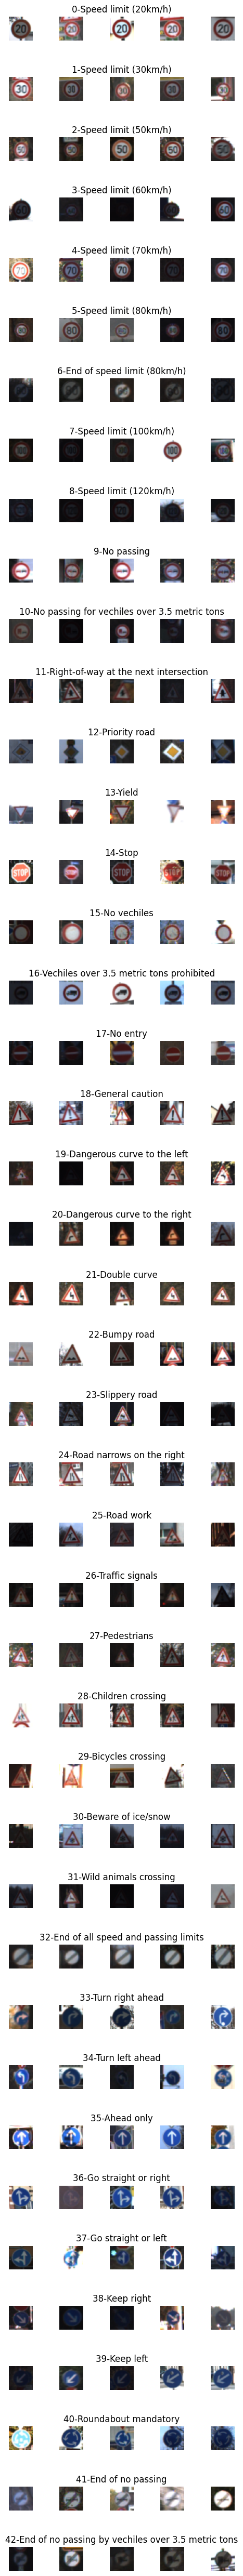

In [11]:
num_of_samples = []

cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "-" + row["SignName"])
            num_of_samples.append(len(x_selected))


    

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


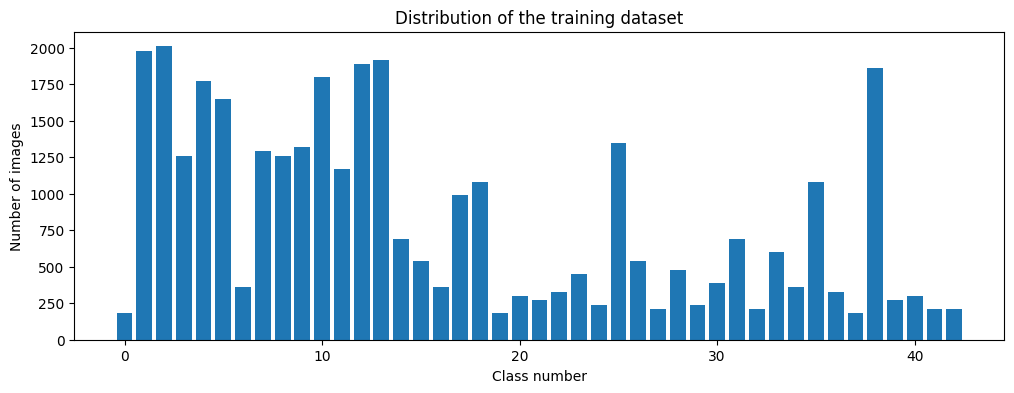

In [12]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
36


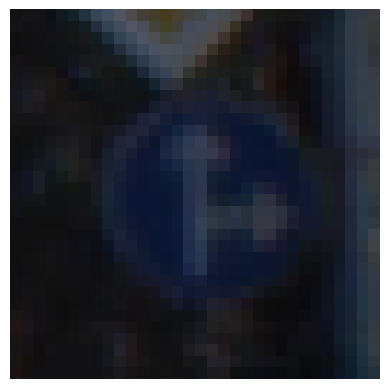

In [13]:
import cv2

plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

(32, 32)


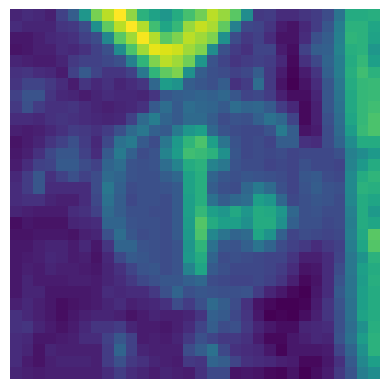

In [14]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")

print(img.shape)


(32, 32)


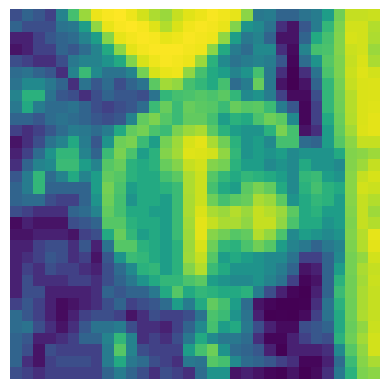

In [15]:
def equalize(img):
   img = cv2.equalizeHist(img)
   return img

img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)


In [16]:
def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255

    return img

X_train = np.array(list(map(preprocessing, X_train)))
X_test = np.array(list(map(preprocessing, X_test)))
X_valid = np.array(list(map(preprocessing, X_valid)))

(34799, 32, 32)


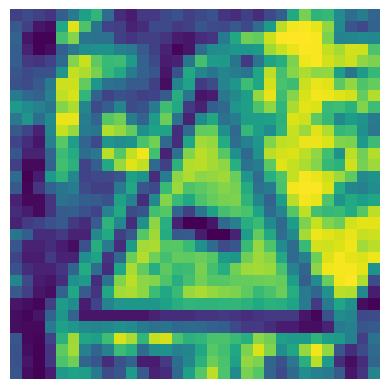

In [17]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis("off")
print(X_train.shape)

In [18]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_valid = X_valid.reshape(4410, 32, 32, 1)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [19]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10)

datagen.fit(X_train) 

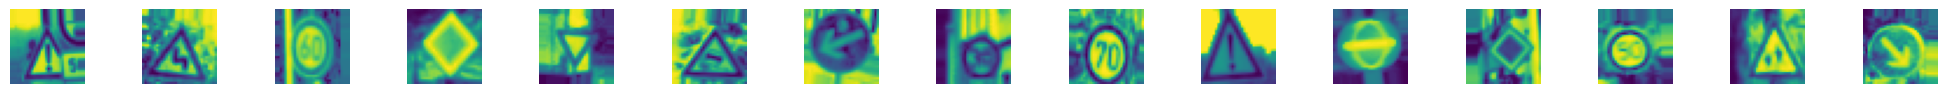

In [20]:
batches = datagen.flow(X_train, y_train, batch_size=15)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32,32))
    axs[i].axis("off")

In [21]:
y_train = to_categorical(y_train, 43)   
y_test = to_categorical(y_test, 43)
y_valid = to_categorical(y_valid, 43)

In [22]:
def modyfi_leNet_model():
    model = Sequential()
    model.add(Conv2D(60, (5,5), input_shape=(32,32,1), activation="relu")) 
    model.add(Conv2D(60, (5,5), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(30, (3,3), activation="relu"))
    model.add(Conv2D(30, (3,3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(500, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation="softmax"))

    model.compile(Adam(learning_rate=0.001), loss = "categorical_crossentropy", metrics=["accuracy"])
    return model

In [23]:
model = modyfi_leNet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 60)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 30)          0         
 g2D)                                                   

In [24]:
history = model.fit_generator(datagen.flow(X_train,y_train,batch_size=50), steps_per_epoch=650, epochs=10, validation_data=(X_valid,y_valid),shuffle=1)

Epoch 1/10


C:\Users\jakub\AppData\Local\Temp\ipykernel_2640\126975022.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,y_train,batch_size=50), steps_per_epoch=650, epochs=10, validation_data=(X_valid,y_valid),shuffle=1)


650/650 [==============================] - 64s 97ms/step - loss: 2.2388 - accuracy: 0.3661 - val_loss: 0.6145 - val_accuracy: 0.8020
Epoch 2/10
650/650 [==============================] - 66s 101ms/step - loss: 0.9055 - accuracy: 0.7192 - val_loss: 0.2446 - val_accuracy: 0.9190
Epoch 3/10
650/650 [==============================] - 65s 101ms/step - loss: 0.5913 - accuracy: 0.8165 - val_loss: 0.1348 - val_accuracy: 0.9639
Epoch 4/10
650/650 [==============================] - 65s 100ms/step - loss: 0.4543 - accuracy: 0.8586 - val_loss: 0.0759 - val_accuracy: 0.9776
Epoch 5/10
650/650 [==============================] - 66s 102ms/step - loss: 0.3895 - accuracy: 0.8773 - val_loss: 0.0556 - val_accuracy: 0.9825
Epoch 6/10
650/650 [==============================] - 58s 89ms/step - loss: 0.3278 - accuracy: 0.8965 - val_loss: 0.0966 - val_accuracy: 0.9719
Epoch 7/10
650/650 [==============================] - 60s 92ms/step - loss: 0.3030 - accuracy: 0.9051 - val_loss: 0.0626 - val_accuracy: 0.9810

Text(0.5, 0, 'epoch')

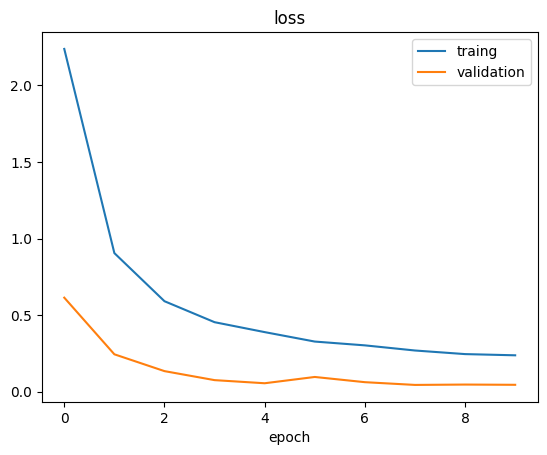

In [25]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["traing", "validation"])
plt.title("loss")
plt.xlabel("epoch")

Text(0.5, 0, 'epoch')

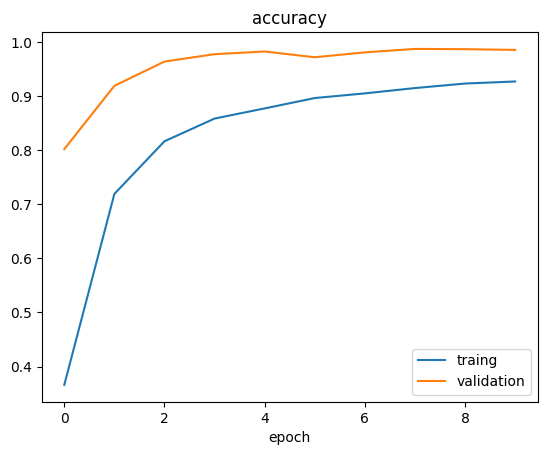

In [26]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["traing", "validation"])
plt.title("accuracy")
plt.xlabel("epoch")

In [27]:
score = model.evaluate(X_test, y_test, verbose=0)
print("test score:", score[0])
print("test acc:", score[1])

test score: 0.12833629548549652
test acc: 0.9623911380767822


(32, 32)
1/1 [==============================] - 0s 80ms/step
Predicted sign: [17]


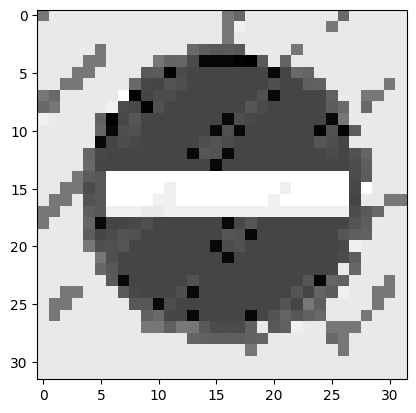

In [28]:
#fetch image
 
import requests
from PIL import Image
url = 'https://media.rcphotostock.com/static2/preview2/stock-photo-do-not-enter-blank-sign-german-traffic-sign-warning-red-circle--18005.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
 
#Preprocess image
 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
 
#Reshape reshape
 
img = img.reshape(1, 32, 32, 1)
 
#Test image
pred = np.argmax(model.predict(img), axis =-1)
print("Predicted sign: " + str(pred))